# Load Dependent Libraries

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

### Download dataset

In [171]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

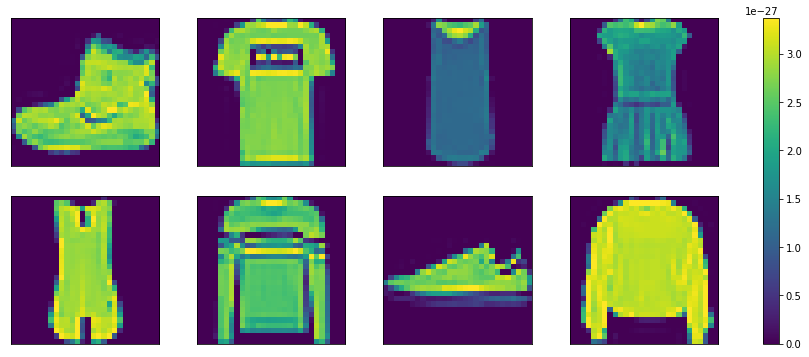

In [183]:
train_images = train_images / 255.0
test_images = test_images / 255.0

fig, axs = plt.subplots(nrows=2, ncols = 4, figsize=(16,6),
                        subplot_kw={'xticks':[], 'yticks':[]})

for ax, image in zip(axs.flat,train_images[0:8]):
    pplot = ax.imshow(image) 


fig.colorbar(pplot, ax=axs.ravel().tolist())    
plt.show()

# Model Generation

#### Every NN is constructed from a series of connected layers that are full of connection nodes. Simple mathematical operations are undertaken at each node in each layer, yet through the volume of connections and operations, these ML models can perform impressive and complex tasks. 

#### Our model will be constructed from 3 layers. The first layer - often referred to as the input layer - will intake an image and format the data structure in a method acceptable for the subsequent layers. In our case, this first layer will be a Flatten layer that intakes a multi-dimensional array and produces an array of a single diemsnion, this places all the pixel data on a equal depth during input. Both of the next layers will be simple fully connected layers, referred to as Dense layers, with 128 and 10 nodes respectively. These fully connected layers are the simplest layer in the sense of understanding, yet allow for the greatest number of layer-to-layer connections and relationships.

#### The final bit of hyper-technical knowledge you'll need to learn this is that each layer can have its own particular mathematical operation. These activation functions determine the form and relationship betwen the information provided by the layer. The first dense layer will feature a Rectified Linear Unit (ReLU) Activation Function that outputs values between zero and 1; mathematically, the activation function behaves like f(x)=max(0,x). The final layer uses the softmax activation function. This function also produces values in the 0-1 range, BUT generates these values such that the sum of the outputs will be 1. This makes the softmax a layer that is excellent at ouputting probabilities. 

In [14]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)), keras.layers.Dense(128, activation=tf.nn.relu), keras.layers.Dense(10, activation=tf.nn.softmax)])

-- Training the Model
       
       Models must be both compiled and trained prior to use. When compiling we must define a few more parameters that control how models are updated during training (optimizer), how the model's accuracy is measured during training (loss function), and what is to be measured to determine the model's accuracy (metrics).

In [19]:
model.compile( optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2279 - accuracy: 0.6981
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6294 - accuracy: 0.7708
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5697 - accuracy: 0.7942
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5242 - accuracy: 0.8170
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5035 - accuracy: 0.8253


# Evaluating the Model

In [20]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 2ms/step - loss: 0.5359 - accuracy: 0.8286


In [31]:
predictions = model.predict(test_images)
predictions[0]

array([5.3996888e-17, 2.3823797e-25, 5.9209519e-31, 4.0932054e-34,
       0.0000000e+00, 1.6292784e-02, 5.0335804e-25, 3.6704034e-02,
       6.4138186e-13, 9.4700319e-01], dtype=float32)

In [37]:
print(np.argmax(predictions[2]))
print(test_labels[2])

1
1
